In [8]:
#Importing libraries
from sklearn import neighbors
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
scaler = MinMaxScaler(feature_range=(0, 1))
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
#Uploading the dataset
import pandas as pd
df = pd.read_excel('dataset.xlsx')
df.head()

,DATE,VALUES
0,1972-08-22,0.2673
1,1972-08-23,0.2703
2,1972-08-24,0.2706
3,1972-08-25,0.2722
4,1972-08-28,0.2704


In [3]:
#Date column is formatted and set as index
df['DATE'] = pd.to_datetime(df.DATE,format='%Y-%m-%d')
df.index = df['DATE']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['DATE', 'VALUES'])

for i in range(0,len(data)):
    new_data['DATE'][i] = data['DATE'][i]
    new_data['VALUES'][i] = data['VALUES'][i]

In [4]:
#Splitting train and test set
train = df[:9744]
valid = df[9744:]

x_train = train.drop('VALUES', axis=1)
y_train = train['VALUES']
x_valid = valid.drop('VALUES', axis=1)
y_valid = valid['VALUES']

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

In [5]:
#Model fitting and making predictions

params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
preds = model.predict(x_valid)

In [6]:
#Calculating the rmse value
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


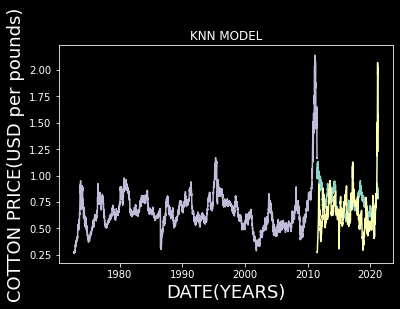

In [9]:
#Plotting the predicted values
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(valid[['VALUES', 'Predictions']])
plt.title('KNN MODEL')
plt.xlabel('DATE(YEARS)',fontsize=18)
plt.ylabel('COTTON PRICE(USD per pounds)',fontsize=18)
plt.plot(train['VALUES'])

In [10]:
#Reshaping the values
val_x = []

val_pred = []
val_x = valid['VALUES']
val_pred = valid['Predictions']

val_x =val_x.to_numpy().reshape(-1,1)
val_pred=val_pred.to_numpy().reshape(-1,1)

In [11]:
cutoff = 0.9                             # decide on a cutoff limit
y_pred_classes = np.zeros_like(val_pred)    # initialise a matrix full with zeros
y_pred_classes[val_pred > cutoff] = 1  
y_test_classes = np.zeros_like(val_pred)
y_test_classes[val_x > cutoff] = 1
cm =confusion_matrix(y_test_classes, y_pred_classes)

In [12]:
#Calculating model accuracy
TP, FP, FN, TN = cm[0][0],cm[0][1],cm[1][0],cm[1][1]
ACC = (TP+TN)/(TP+TN+FP+FN)
print("*****KNN****")
print("RMSE value : ",rms)
print("ACCURACY : ",ACC)

*****KNN****
RMSE value :  0.23223387869343529
ACCURACY :  0.8662085691188359
